# 統計

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

## 標準偏差

In [2]:
x = np.array([21.9, 24.5, 23.4, 26.2, 15.3, 22.4, 21.8, 16.8,
              19.9, 19.1, 21.9, 25.9, 20.9, 18.8, 22.1, 20.0,
              15.0, 16.0, 22.2, 26.4, 26.0, 28.3, 18.7, 21.3,
              22.5, 25.0, 22.0, 26.1, 25.6, 25.7])

In [3]:
mean_ = x.mean()
sum_ = x.sum()
std_ = np.sqrt( ((x-mean_)**2).sum() / len(x) )
print("平均値 : {:.4f}".format(mean_))
print("合計値 : {:.4f}".format(sum_))
print("標準偏差 : {:.4f}".format(std_))

平均値 : 22.0567
合計値 : 661.7000
標準偏差 : 3.4908


In [4]:
std = x.std()
print("標準偏差 : {:.4f}".format(std))

標準偏差 : 3.4908


## 共分散と相関係数

In [5]:
# 2018年4月の札幌の最高気温（日別）
y = np.array([8.3, 13.0, 8.4, 7.9, 7.0, 3.7, 6.1, 8.5, 8.6,
              11.9, 12.1, 14.4, 7.0, 10.5, 6.6, 10.6, 16.6,
              19.1, 20.1, 19.8, 24.5, 12.6, 16.4, 13.0, 13.3,
              14.1, 14.4, 17.0, 21.3, 24.5])

In [6]:
mean_x = x.mean()
mean_y = y.mean()
sigma_xx = ((x - mean_x)**2).sum() / len(x)
sigma_yy = ((y - mean_y)**2).sum() / len(y)
sigma_xy = ((x - mean_x) * (y - mean_y)).sum() / len(x)
print("東京の最高気温の標準偏差 : {:.2f}".format(np.sqrt(sigma_xx)))
print("札幌の最高気温の標準偏差 : {:.2f}".format(np.sqrt(sigma_yy)))
print("共分散 : {:.2f}".format(sigma_xy))
print("相関係数 : {:.3f}".format(sigma_xy / np.sqrt(sigma_xx * sigma_yy)))

東京の最高気温の標準偏差 : 3.49
札幌の最高気温の標準偏差 : 5.43
共分散 : 5.49
相関係数 : 0.290


## 正規分布と確率密度関数

### 確率密度関数

In [7]:
from scipy.stats import norm

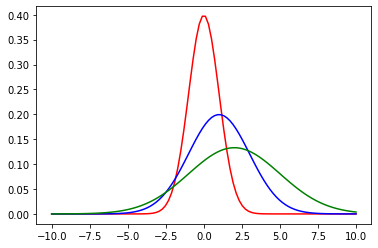

In [8]:
x = np.linspace(-10, 10, 100)
y1 = norm.pdf(x) # 平均=0, 標準偏差=1の正規分布
y2 = norm.pdf(x, loc=1, scale=2) # 平均=1, 標準偏差=2の正規分布
y3 = norm.pdf(x, loc=2, scale=3) # 平均=2, 標準偏差=3の正規分布
plt.plot(x, y1, color="r")
plt.plot(x, y2, color="b")
plt.plot(x, y3, color="g")
plt.show()

### 累積分布関数

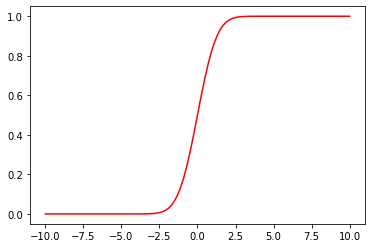

In [9]:
x = np.linspace(-10, 10, 100)
f = norm.cdf(x)
plt.plot(x, f, color="r")
plt.show()

### 正規分布の実例: コイントス

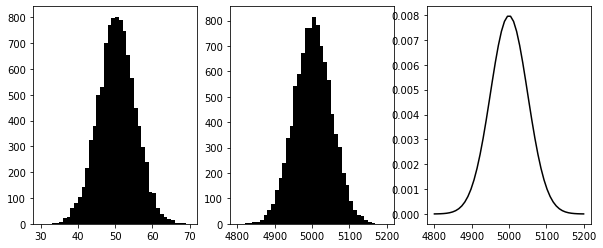

標準偏差1 : 4.997525
標準偏差2 : 50.088109
標準偏差3 : 50.000000


In [10]:
# n個のコインをm回投げる
def cointoss(n, m):
    l = []
    for _ in range(m):
        r = np.random.randint(2, size=n)
        l.append(r.sum())
    
    return l
        
np.random.seed(0)
fig, axes = plt.subplots(1, 3, figsize=(10,4))

# グラフ1
l = cointoss(100, 10000)
axes[0].hist(l, range=(30, 70), bins=40, color="k")
std1 = np.array(l).std()

# グラフ2
l = cointoss(10000, 10000)
axes[1].hist(l, range=(4800, 5200), bins=40, color="k")
std2 = np.array(l).std()

# グラフ3
x = np.linspace(4800, 5200)
std3 = 50
l = norm.pdf(x, loc=5000, scale=std3) # 平均=5000, 標準偏差=50の正規分布
axes[2].plot(x, l, color="k")

# グラフ表示
plt.show()

# 標準偏差
print("標準偏差1 : {:f}".format(std1))
print("標準偏差2 : {:f}".format(std2))
print("標準偏差3 : {:f}".format(std3))